@Author: Bhupinder Singh

@Date: 07-01-2023

@Last Modified by: Bhupinder Singh

@Last Modified date: 10-01-2023

@Title: Write a Python program to implement Linear Regression Model by using Cost function and Gradient Descent Function

In [414]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from csv import reader
import seaborn as sns
import math
import operator
from array import *
from scipy import stats

### Import the dataset 

In [415]:
data = pd.read_csv('train.csv')

### Getting Insights of dataset

In [416]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 700 entries, 0 to 699
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       700 non-null    float64
 1   y       699 non-null    float64
dtypes: float64(2)
memory usage: 11.1 KB


In [417]:
data.describe()

,x,y
count,700.000000,699.000000
mean,54.985939,49.939869
std,134.681703,29.109217
min,0.000000,-3.839981
25%,25.000000,24.929968
50%,49.000000,48.973020
75%,75.000000,74.929911
max,3530.157369,108.871618


### Checking for Null values in data set

In [418]:
data.isnull().sum()

x    0
y    1
dtype: int64

### Seeing the distribution of 'y' feature

C:\Users\Asus\AppData\Local\Temp\ipykernel_29364\759327198.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['y'],color='green')


<AxesSubplot: xlabel='y', ylabel='Density'>

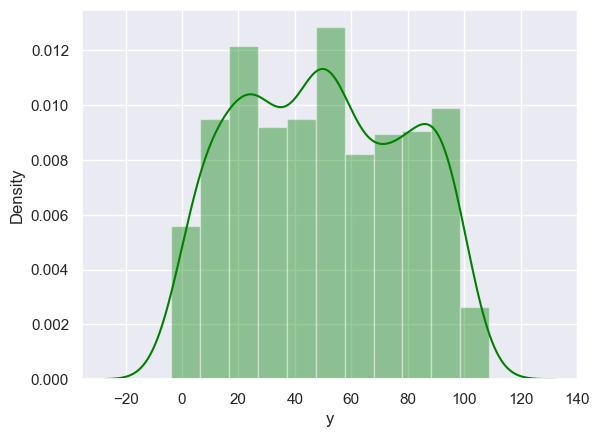

In [419]:
sns.set(style='darkgrid')
sns.distplot(data['y'],color='green')

### Seeing the distribution of 'x' feature

C:\Users\Asus\AppData\Local\Temp\ipykernel_29364\2591545795.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data['x'],color='green')


<AxesSubplot: xlabel='x', ylabel='Density'>

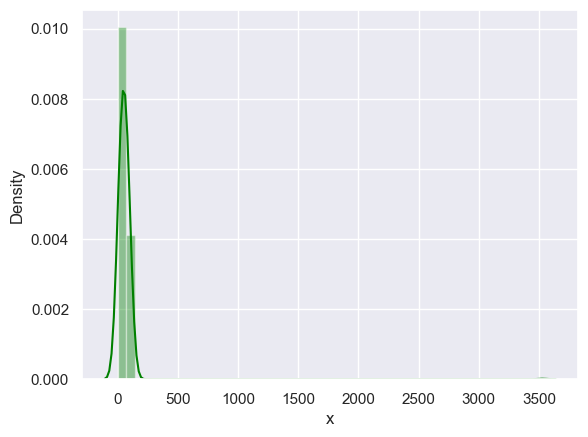

In [420]:
sns.set(style='darkgrid')
sns.distplot(data['x'],color='green')

### Checking for outliers

<AxesSubplot: xlabel='x'>

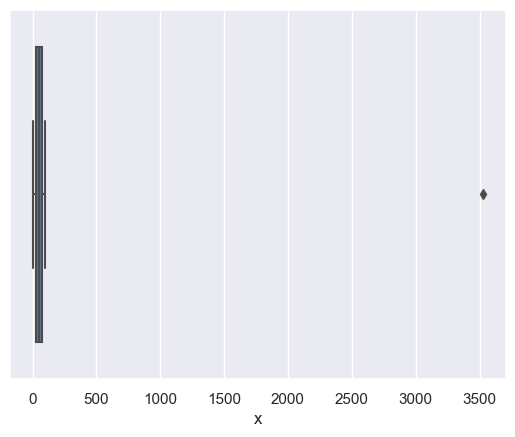

In [421]:
sns.boxplot(x=data["x"])

<AxesSubplot: xlabel='y'>

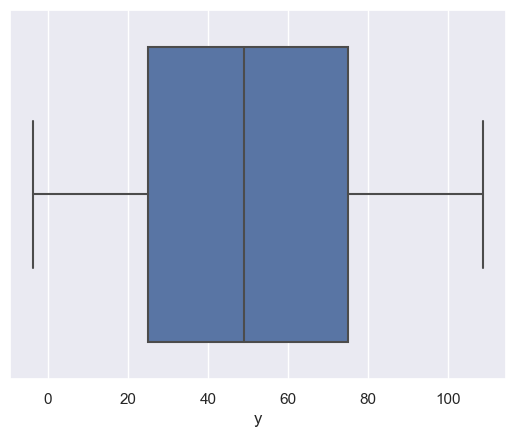

In [422]:
sns.boxplot(x=data["y"])

### Handling Missing Values

In [423]:
data['y']=data["y"].fillna(data["y"].mean())
data.shape

(700, 2)

In [424]:
data['zscore_x'] = ( data.x - data.x.mean() ) / data.x.std()
data.head(5)

,x,y,zscore_x
0,24.0,21.549452,-0.230068
1,50.0,47.464463,-0.037020
2,15.0,17.218656,-0.296892
3,38.0,36.586398,-0.126119
4,87.0,87.288984,0.237702


In [425]:
data[(data.zscore_x<-3) | (data.zscore_x>3)]

,x,y,zscore_x
213,3530.157369,49.939869,25.802847


### Removing Outliers

In [426]:
data= data[(data.zscore_x>-3) & (data.zscore_x<3)]
data.head()

,x,y,zscore_x
0,24.0,21.549452,-0.230068
1,50.0,47.464463,-0.037020
2,15.0,17.218656,-0.296892
3,38.0,36.586398,-0.126119
4,87.0,87.288984,0.237702


<AxesSubplot: xlabel='x'>

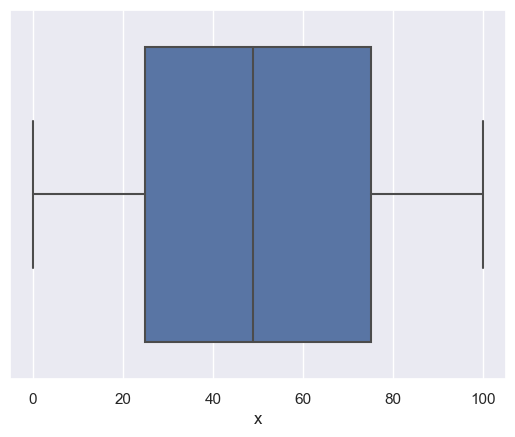

In [427]:
sns.boxplot(x=data["x"])

### Featue Scaling

In [428]:
def feature_standarization(data_frame,col_name):
    standarized_output = []
    for i in data_frame[col_name]:
        standarized_value = (i - data_frame[col_name].mean())/data_frame[col_name].std()
        standarized_output.append(standarized_value)
    return standarized_output

In [429]:
x_list = feature_standarization(data,'x')
y_list = feature_standarization(data,'y')
data.drop(['x','y'],axis=1,inplace=True)
data.insert(loc=0, column="x", value=x_list)
data.insert(loc=1, column="y", value=y_list)

In [430]:
data.head()

,x,y,zscore_x
0,-0.898453,-0.975307,-0.230068
1,-0.000494,-0.085039,-0.037020
2,-1.209285,-1.124084,-0.296892
3,-0.414937,-0.458737,-0.126119
4,1.277370,1.283068,0.237702


### Compute the cost function J(theta)  
j(theta)= 1/2m (summation(h(x)- y)**2)

1/m - means we determine the average

1/2m the 2 makes the math a bit easier


In [431]:
def computeCost(x_train,y_train,theta):
    """
    Description:
            generate the cost function of using theta as parameter in a linear regression model
    Parameter:
        x_train: x values from train dataset
        y_train: y values from train dataset
        theta: theta values from gradient descent function
    Return:
            Returns computed cost
    """
    square_err=(x_train.dot(theta) - y_train)**2
    
    return 1/(2*len(x_train)) * np.sum(square_err)

### Initialize X,y and compute the cost.

In [432]:
data_n=data.values
m=len(data_n[:,-1])  # Size of column X
x_train=np.append(np.ones((m,1)),data_n[:,0].reshape(m,1),axis=1)
y_train=data_n[:,1].reshape(m,1)
theta=np.zeros((2,1)) 
computeCost(x_train,y_train,theta)

0.49928469241773965

In [433]:
print(x_train.shape)
print(y_train.shape)

(699, 2)
(699, 1)


### Implement gradient descent to optimize theta, by minimizing the cost function J(theta)

theta(j) = theta(j)- alpha(derivative(j(theta 0,theta 1)))

In [434]:
def gradientDescent(x_train,y_train,theta,alpha,num_iters):
    """
    Description:
            update theta by taking   num_iters gradient steps with learning rate of alpha
    Parameter:
        X: x values from train dataset
        y: y values from train dataset
        theta: initial theta values 
        alpha: learning rate
        num_iters: Number of epochs
    Return:
            Returns the computed theta and cost function value
    """
    J_history=[]
    
    for i in range(num_iters):
        theta-=alpha * 1/len(x_train) * np.dot(x_train.transpose(),(x_train.dot(theta) -y_train))
        cost= computeCost(x_train,y_train,theta)
        J_history.append(cost)
        print(f"For Epoch {i} Theta :{theta} Cost = {cost}")
    return theta,J_history

In [435]:
alpha= 0.01
epochs= 500
theta,J_history= gradientDescent(x_train,y_train,theta,alpha,epochs)
print(f"Final theta values : {theta}")
print("h(x) ="+str(round(theta[0,0],2))+" + "+str(round(theta[1,0],2))+"x1")

For Epoch 0 Theta :[[-2.45551473e-18]
 [ 9.93915959e-03]] Cost = 0.48945532585882484
For Epoch 1 Theta :[[-4.76172908e-18]
 [ 1.97790698e-02]] Cost = 0.47982128526401185
For Epoch 2 Theta :[[-7.02664758e-18]
 [ 2.95207216e-02]] Cost = 0.47037868917949327
For Epoch 3 Theta :[[-9.47898571e-18]
 [ 3.91650963e-02]] Cost = 0.46112373328244527
For Epoch 4 Theta :[[-1.13182393e-17]
 [ 4.87131653e-02]] Cost = 0.45205268884830535
For Epoch 5 Theta :[[-1.38436393e-17]
 [ 5.81658901e-02]] Cost = 0.44316190124850857
For Epoch 6 Theta :[[-1.65755186e-17]
 [ 6.75242229e-02]] Cost = 0.43444778847807586
For Epoch 7 Theta :[[-1.88849095e-17]
 [ 7.67891063e-02]] Cost = 0.4259068397124622
For Epoch 8 Theta :[[-2.14865480e-17]
 [ 8.59614734e-02]] Cost = 0.41753561389308186
For Epoch 9 Theta :[[-2.36561684e-17]
 [ 9.50422480e-02]] Cost = 0.4093307383409423
For Epoch 10 Theta :[[-2.60354447e-17]
 [ 1.04032345e-01]] Cost = 0.40128890739782724
For Epoch 11 Theta :[[-2.82749503e-17]
 [ 1.12932669e-01]] Cost = 

### Plotting the cost function against the number of iterations
It gave a nice descending trend, indicating that the gradient descent implementation works in reducing the cost function

Text(0.5, 1.0, 'Cost function using Gradient Descent')

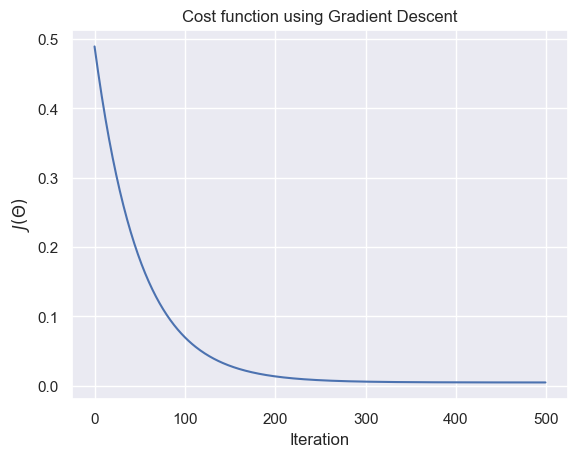

In [436]:
plt.plot(J_history)
plt.xlabel("Iteration")
plt.ylabel("$J(\Theta)$")
plt.title("Cost function using Gradient Descent")

### Ploting data points with best fit line

Text(0.5, 1.0, 'Ploting data points with best fit line')

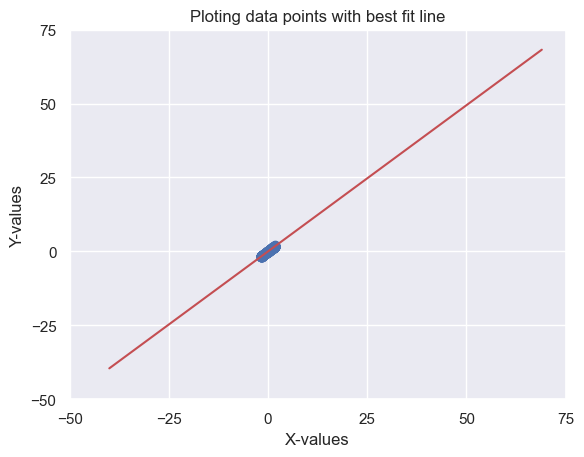

In [453]:
plt.scatter(data.x,data.y)
x_value=[x for x in range(-40,70)]
y_value=[y*theta[1]+theta[0] for y in x_value]
plt.plot(x_value,y_value,color="r")
plt.xticks(np.arange(-50,100,step=25))
plt.yticks(np.arange(-50,100,step=25))
plt.xlabel("X-values")
plt.ylabel("Y-values")
plt.title("Ploting data points with best fit line")

### Implementing Performance Metrices to check the goodness of the model with test Data set

Importing Test DataSet

In [438]:
test_data = pd.read_csv('test.csv')

### Feature Scaling for Test data

In [439]:
x_list = feature_standarization(test_data,'x')
y_list = feature_standarization(test_data,'y')
test_data.drop(['x','y'],axis=1,inplace=True)
test_data.insert(loc=0, column="x_test", value=x_list)
test_data.insert(loc=1, column="y_test", value=y_list)

In [440]:
test_data

,x_test,y_test
0,0.914365,0.982754
1,-1.050251,-0.964099
2,-1.015169,-0.880443
3,-1.085334,-1.147092
4,-0.524015,-0.321799
...,...,...
295,0.703871,0.596490
296,-0.173190,-0.133126
297,0.142552,0.099258
298,0.388129,0.415944


In [441]:
y_pred=[(item*theta[1]+theta[0]).tolist() for item in test_data['x_test']]
print(y_pred)

[[0.9040812107555901], [-1.0384388481642102], [-1.0037509899692136], [-1.0731267063592065], [-0.5181209752392636], [-1.2465659973341887], [0.3837633378306436], [1.5284626582655259], [-1.0731267063592065], [-1.593444579284153], [-1.6281324374791495], [-1.107814564554203], [1.5631505164605222], [0.3837633378306436], [-0.5181209752392636], [-1.2465659973341887], [0.48782691241563286], [-1.281253855529185], [1.2509597927055542], [0.6265783451956186], [1.320335509095547], [0.002196897685682841], [1.320335509095547], [-0.8303116989942315], [1.5978383746555187], [0.24501190505065784], [0.973456927145583], [-1.0384388481642102], [1.459086941875533], [-0.8303116989942315], [1.6672140910455115], [-0.6915602662142457], [-0.6221845498242529], [1.0081447853405794], [-0.7956238407992351], [-0.1365545350943029], [0.07157261407567571], [0.6265783451956186], [-0.7956238407992351], [-0.6221845498242529], [1.3897112254855402], [0.6959540615856115], [-0.03249096050931359], [0.8693933525605937], [-1.628132

In [442]:
test_data.head()

,x_test,y_test
0,0.914365,0.982754
1,-1.050251,-0.964099
2,-1.015169,-0.880443
3,-1.085334,-1.147092
4,-0.524015,-0.321799


In [443]:
x_test=test_data['x_test']
y_test=test_data['y_test']

### Mean Square Error

In [444]:
summation = 0  #variable to store the summation of differences
n = len(x_test) #finding total number of items in list
for i in range (0,n):  #looping through each element of the list
  difference = y_test[i] - y_pred[i]  #finding the difference between observed and predicted value
  squared_difference = difference**2  #taking square of the differene 
  summation = summation + squared_difference  #taking a sum of all the differences
MSE = summation/n  #dividing summation by total values to obtain average
print ("The Mean Square Error is: " , MSE)

The Mean Square Error is:  [0.01087682]


### Mean Absolute Error

In [445]:
# Calculating Mean Absolute Error  
n = len(x_test)
sum = 0  
# for loop for iteration
for i in range(n):
    sum += abs(y_test[i] - y_pred[i])
  
error = sum/n
  
# display
print("Mean absolute error : " + str(error))

Mean absolute error : [0.08281039]


### Root Mean Square Error

In [446]:
n = len(x_test)
sum=0
for i in range(n):
    squared_diff = (y_test[i]-y_pred[i])**2
    sum+= squared_diff
error = sum/n
error=error**0.5 

print("Root Mean Square Error:\n")
print(error)

Root Mean Square Error:

[0.10429198]


### calculating R-squared value for measuring goodness of our model. 

In [447]:
# calculating R-squared value for measuring goodness of our model. 
mean_y = np.mean(y_test)
ss_t = 0 #total sum of squares
ss_r = 0 #total sum of square of residuals
for i in range(len(y_test)): # val_count represents the no.of input x values
  
  ss_t += (y_test[i] - mean_y) ** 2
  ss_r += (y_test[i] - y_pred[i]) ** 2
r2 = 1 - (ss_r/ss_t)

print(r2)

[0.98908681]


### Adjusted R-Square 
Here,
N = number of records in the data set.
p = number of independent variables.

In [448]:
#calculate r-squared
N=len(x_test)
p=1
x = (1-r2)
y = (N-1) / (N-p-1)
adj_rsquared = (1 - (x * y))
print("Adjusted-R2 : " , adj_rsquared)

Adjusted-R2 :  [0.98905018]
